Unit 6 | Assignment - What's the Weather Like?
Background
Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: "Duh. It gets hotter..."

But, if pressed, how would you prove it?

Equator
WeatherPy
In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

1. Temperature (F) vs. Latitude
2. Humidity (%) vs. Latitude
3. Cloudiness (%) vs. Latitude
4. Wind Speed (mph) vs. Latitude


Your final notebook must:

Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
Perform a weather check on each of the cities using a series of successive API calls.
Include a print log of each city as it's being processed with the city number, city name, and requested URL.
Save both a CSV of all data retrieved and png images for each scatter plot.
As final considerations:

You must use the Matplotlib and Seaborn libraries.
You must include a written description of three observable trends based on the data.
You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
You must include an exported markdown version of your Notebook called  README.md in your GitHub repository.
See Example Solution for a reference on expected format.
Hints and Considerations
You may want to start this assignment by refreshing yourself on 4th grade geography, in particular, the geographic coordinate system.

Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

Though we've never worked with the citipy Python library, push yourself to decipher how it works, and why it might be relevant. Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

In [119]:
import requests
import json
import citipy
import random
import pandas as pd
from citipy import citipy
from localenv import api_key

# api.openweathermap.org/data/2.5/find?q=London

In [120]:
sample_size = 10
lat = 0
long = 0
cities = []

for i in range(sample_size):
    lat=round(random.uniform(-90, 90),2)
    long=round(random.uniform(-180, 180),2)
    cities.append(citipy.nearest_city(lat, long))
    

In [121]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

params = {"appid": api_key,
          "q": "",
          "units":"imperial"}

In [140]:
weather_json_l = []
counter = 0
for city in cities:
    counter += 1
    params["q"] = city.city_name
    target_url= f"{base_url}appid={api_key}&units=imperial&q={city.city_name}"
    print(f"Processing Record {counter} of {sample_size} | {city.city_name}")
    print(target_url)
    response = requests.get(target_url).json()
    #response = requests.get(base_url,params=params).json()
    try:
        if (response):
            weather_json_l.append(response)
    except Exception as e:
        print(e)
        
print(len(weather_json_l))
weather_json_l[0]
weather_json_l[0]["dt"]

Processing Record 1 of 10 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=ushuaia
Processing Record 2 of 10 | albany
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=albany
Processing Record 3 of 10 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=mataura
Processing Record 4 of 10 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=arraial do cabo
Processing Record 5 of 10 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=bluff
Processing Record 6 of 10 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=punta arenas
Processing Record 7 of 10 | ahipara
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de

1519952400

In [139]:
# Extract interesting data from responses
city_names = [data.get("name") for data in weather_json_l]
country_data = [data.get("sys").get("country","No Name") for data in weather_json_l]
date_data = [data.get("dt","Not Found") for data in weather_json_l]
lat_data = [data.get("coord", "Not Found").get("lat", "Not Found") for data in weather_json_l]
temp_data = [data.get("main","Not Found").get("temp_max", "Not Found") for data in weather_json_l]
humidity_data =[data.get("main", "Not Found").get("humidity", "Not Found") for data in weather_json_l]
cloudiness_data = [data.get("clouds").get("all", "Not Found") for data in weather_json_l]
wind_speed_data = [data.get("wind").get("speed", "Not Found") for data in weather_json_l]

weather_dict = {"City":city_names, "Country" : country_data,
                "Date" : date_data, "Latitude": lat_data, 
                "Temperature (F)": temp_data, "Humidity (%)" : humidity_data,
                "Cloudiness (%)": temp_data, "Wind Speed (mph)" : humidity_data}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

#Saving to CSV
weather_df.to_csv("WeatherPyData.csv",index=False)


AttributeError: 'NoneType' object has no attribute 'get'

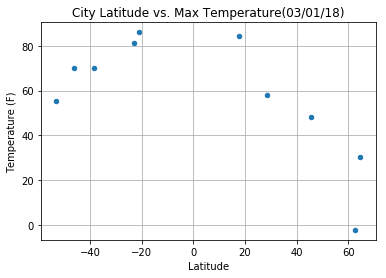

In [127]:
#Plotting  Temperature vs Latitude
ax1 = weather_df.plot(kind="scatter",
                x="Latitude", 
                y="Temperature (F)",
                marker="o",
                title="City Latitude vs. Max Temperature(03/01/18)",
                grid=True
               )

fig = ax1.get_figure()
fig.savefig("TemperaturevsLatitude.png");

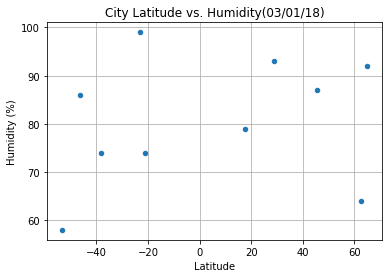

In [91]:
#Plotting % Humidity vs Latitude
ax2 = weather_df.plot(kind="scatter",
                x="Latitude", 
                y="Humidity (%)",
                marker="o",
                title="City Latitude vs. Humidity(03/01/18)",
                grid=True
               )

fig = ax2.get_figure()
fig.savefig("HumidityvsLatitude.png");

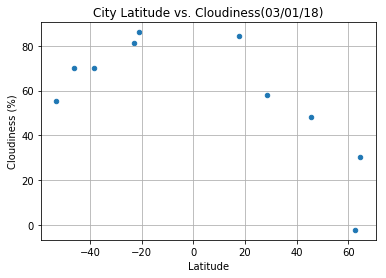

In [92]:
#Plotting % Cloudiness vs Latitude
ax3 = weather_df.plot(kind="scatter",
                x="Latitude", 
                y="Cloudiness (%)",
                marker="o",
                title="City Latitude vs. Cloudiness(03/01/18)",
                grid=True
               )

fig = ax3.get_figure()
fig.savefig("CloudinessvsLatitude.png");

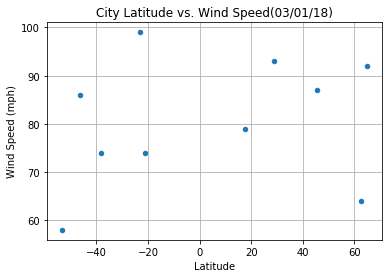

In [93]:
#Plotting % Humidity vs Latitude
ax4 = weather_df.plot(kind="scatter",
                x="Latitude", 
                y="Wind Speed (mph)",
                marker="o",
                title="City Latitude vs. Wind Speed(03/01/18)",
                grid=True
               );

fig = ax4.get_figure()
fig.savefig("WindSpeedvsLatitude.png");